---
<center><h1>Used Medical Insurance Prediction</h1></center>
<center><h3>Part of 30 Days 30 ML Projects Challenge</h3></center>

---

## 1) Understanding Problem Statement
---

The goal of this project is to leverage machine learning **to develop a machine learning model that can predict the medical insurance cost based on its features**. This falls under **Regression Machine Learning Problem**. The aim is to assist insurance companies, healthcare providers, and individuals in making informed decisions about insurance coverage and premium pricing.

## 2) Understanding Data
---

The project uses **Medical Insurance Cost Data** which contains several variables (independent variables) and one outcome variable (dependent variable).

## 3) Getting System Ready
---
Importing required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Data Eyeballing
---

### Laoding Data

In [2]:
medical_insurance_df = pd.read_csv('Datasets/Day11_Medical_Insurance_Data.csv') 

In [3]:
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print('The size of Dataframe is: ', medical_insurance_df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
medical_insurance_df.info()
print('-'*100)

The size of Dataframe is:  (1338, 7)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----------------------------------------------------------------------------------------------------


In [5]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in medical_insurance_df.columns if medical_insurance_df[feature].dtype != 'O']
categorical_features = [feature for feature in medical_insurance_df.columns if medical_insurance_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [6]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=medical_insurance_df.isnull().sum().sort_values(ascending=False)
percent=(medical_insurance_df.isnull().sum()/medical_insurance_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [7]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
medical_insurance_df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
medical_insurance_df.describe(include='object').T

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


## 5) Data Cleaning & Preprocessing
---

### Distribution of Age

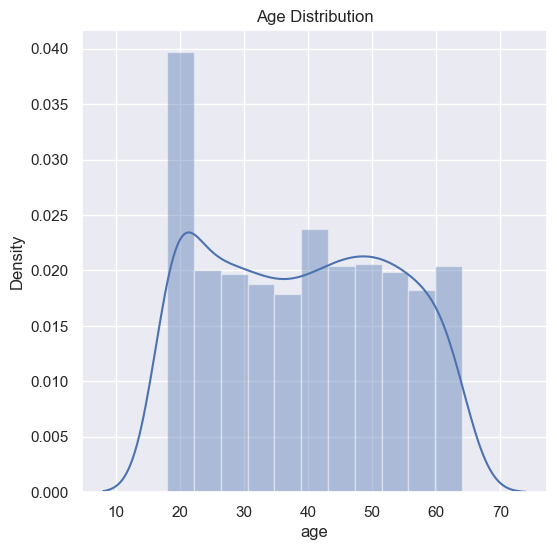

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_df['age'])
plt.title('Age Distribution')
plt.show()

### Sex Distribution

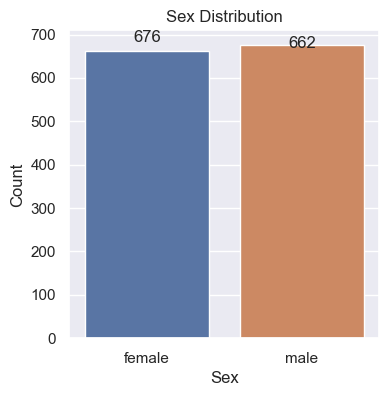

In [18]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='sex', data=medical_insurance_df)
plt.title('Sex Distribution')

counts = medical_insurance_df['sex'].value_counts()

for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### BMI Distribution

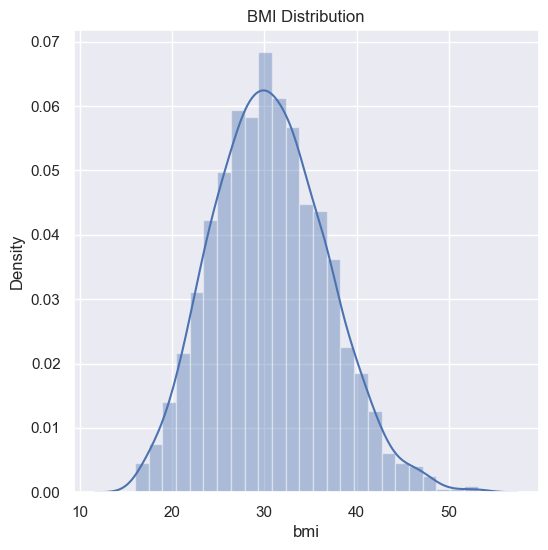

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_df['bmi'])
plt.title('BMI Distribution')
plt.show()

### Children Count Distribution

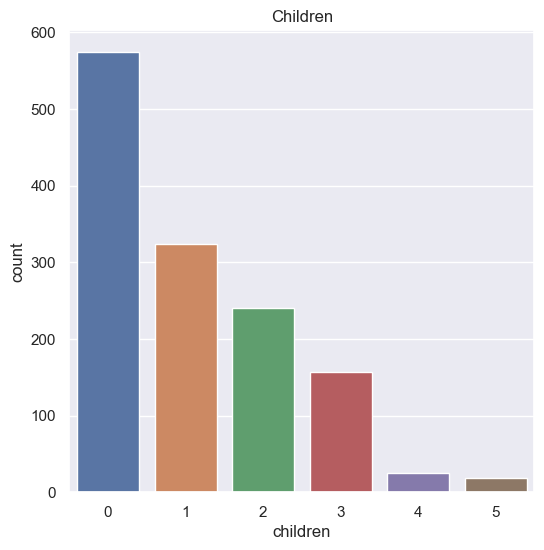

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=medical_insurance_df)
plt.title('Children')
plt.show()

In [27]:
children_count = medical_insurance_df['children'].value_counts()
children_count

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Smoker Distribution

## 6) Model Building
---

### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [11]:
# separating the data and labels
X = used_car_df.drop(columns = ['Car_Name','Selling_Price'], axis=1) # Feature matrix
y = used_car_df['Selling_Price'] # Target variable

In [12]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [13]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Data Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data = scaler.transform(X)

In [17]:
standardized_data

array([[ 0.128897  , -0.23621461, -0.25622446, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [-0.21751369,  0.22150462,  0.1559105 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.25742689, -0.77396901, ..., -0.73728539,
        -0.39148015, -0.17450057],
       ...,
       [-1.60315648,  0.39068691,  1.31334003, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.56450434, -0.7198763 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 0.8217184 , -0.20029235, -0.81095812, ..., -0.73728539,
        -0.39148015, -0.17450057]])

In [18]:
X = standardized_data

In [19]:
X

array([[ 0.128897  , -0.23621461, -0.25622446, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [-0.21751369,  0.22150462,  0.1559105 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.25742689, -0.77396901, ..., -0.73728539,
        -0.39148015, -0.17450057],
       ...,
       [-1.60315648,  0.39068691,  1.31334003, ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 1.16812909,  0.56450434, -0.7198763 , ..., -0.73728539,
        -0.39148015, -0.17450057],
       [ 0.8217184 , -0.20029235, -0.81095812, ..., -0.73728539,
        -0.39148015, -0.17450057]])

### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


In [22]:
print(y.shape, y_train.shape, y_test.shape)

(301,) (240,) (61,)


### Model Comparison : Training & Evaluation

In [23]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [25]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,1.201595,2.321360,1.523601,0.893639
Lasso,1.560071,4.372852,2.091136,0.799643
Ridge,1.201030,2.326063,1.525143,0.893423
SVR,1.040184,4.062913,2.015667,0.813844
Decision Tree Regressor,0.524754,0.843621,0.918489,0.961347
Random Forest Regressor,0.494918,0.653351,0.808301,0.970064


### Inference

In the context of predicting used car prices,
- **Random Forest Regressor** seems to be the **best-performing model** followed closely by the Decision Tree Regressor and the linear regression-based models. These models offer relatively low prediction errors and good explanatory power for the variance in car prices. However, the choice of the best model may also depend on other factors such as computational complexity and interpretability.